# Inferring cosmological parameters with supernovae

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Scientific background

Supernovae Type Ia (SNe Ia) are crucial tools in modern cosmology due to their consistent intrinsic brightness, which makes them reliable "standard candles." These supernovae occur in binary star systems where a white dwarf accumulates material from its companion until it reaches a critical mass and undergoes a thermonuclear explosion. The near-uniform peak luminosity of SNe Ia allows astronomers to determine their distances by comparing their intrinsic and observed brightness.
By measuring the redshift of the host galaxies of these supernovae, we can infer how much the universe has expanded since the light was emitted. Combining distance measurements with redshifts enables us to map the relationship between the distance and velocity of galaxies, known as the Hubble-Lemaître law:
$$
v = H_0 d,
$$
where $v$ is the recessional velocity, $d$ is the (proper) distance, and $H_0$ is the Hubble constant. The Hubble constant is a fundamental cosmological parameter that quantifies the rate of expansion of the universe.
At small redshifts, the recessional velocity $v$ can be approximated as $v \approx cz$, where $c$ is the speed of light. For larger redshifts, this relationship is generalized using the **luminosity distance** $d_L$, which is defined as
$$
d_L = (1 + z) r(z),
$$
where 
$$
r(z) = \begin{cases}\frac{1}{\sqrt{\Omega_k}} \sinh \left(\sqrt{\Omega_k} \chi(z)\right), & \Omega_k>0 \text { (open universe) } \\ \chi(z), & \Omega_k=0 \text { (flat universe) } \\ \frac{1}{\sqrt{\left|\Omega_k\right|}} \sin \left(\sqrt{\left|\Omega_k\right|} \chi(z)\right), & \Omega_k<0 \text { (closed universe) }\end{cases}
$$
is the comoving distance to the source at redshift $z$, and $\chi(z)$ is the line-of-sight integral of the inverse Hubble parameter
$$
\chi(z) = \int_0^z \frac{c \, dz'}{H(z')}.
$$
Here, $H(z)$ is the Hubble parameter, given in $\Lambda$CDM cosmology by
$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_\Lambda + \Omega_k (1+z)^2},
$$
where, $\Omega_m$, $\Omega_\Lambda$, and $\Omega_k$ represent the matter, dark energy, and curvature density parameters, respectively, and $H_0$ is the Hubble constant.
The luminosity distance is related to the distance modulus $\mu$ by:
$$
d_L = 10^{\mu/5 + 1} \, \text{pc}.
$$
In this project, you will use **supernova measurements** to infer **cosmological parameters**, either using **probabilistic inference** (e.g. in NumPyro) or **simulation-based inference** (e.g. using sbi).



## Data

For a start, we recommend using the Pantheon dataset from https://github.com/PantheonPlusSH0ES/DataRelease.

In [2]:
# Download the Pantheon+ dataset
# !wget https://github.com/PantheonPlusSH0ES/DataRelease/raw/refs/heads/main/Pantheon+_Data/4_DISTANCES_AND_COVAR/Pantheon+SH0ES.dat

In [3]:
# read Pantheon+ data into a pandas dataframe, data is separated by whitespace, first row is header
df = pd.read_csv('Pantheon+SH0ES.dat', sep='\s+', header=0)

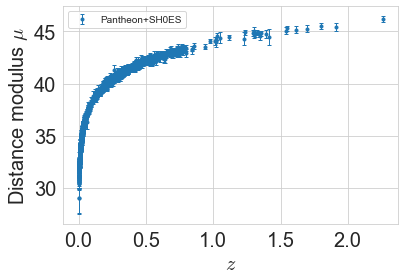

In [4]:
fig, ax = plt.subplots()
ax.errorbar(df['zHD'], df['MU_SH0ES'], df['MU_SH0ES_ERR_DIAG'], ls='None', marker='.', lw=1, capsize=2, label='Pantheon+SH0ES')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'Distance modulus $\mu$')
ax.legend()
# **WARNING, DO NOT FIT COSMOLOGICAL PARAMETERS WITH THESE UNCERTAINTIES. YOU MUST USE THE FULL COVARIANCE. THIS IS ONLY FOR PLOTTING/VISUAL PURPOSES**



In [5]:
print(df['zHD'].shape)

(1701,)


## Task

Due to the dependence of the datapoint on the cosmic distance ladder, the measurements can actually not be treated as independent. Therefore, a serious cosmological analysis of the data should use a covariance matrix (which is also provided at https://github.com/PantheonPlusSH0ES/DataRelease/tree/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR). However, for a start, you can ignore the covariance matrix and treat the measurements as independent. **Your task is now to build a simple analysis framework (either using probabilistic programming, e.g. in NumPyro, or using simulation-based inference, e.g. in sbi) that infers cosmological parameters from the Pantheon+ dataset.**

Once you have built your analysis framework, you can extend the complexity of your analysis framework, e.g. by including the covariance matrix, by including additional data, or by including additional parameters.

## References        

* Pantheon+ paper: https://arxiv.org/abs/2112.03863  (The Pantheon+ Analysis: The Full Dataset and Light-Curve Release)
* SH0ES paper: https://arxiv.org/abs/2112.04510 (A Comprehensive Measurement of the Local Value of the Hubble Constant with 1 km/s/Mpc Uncertainty from the Hubble Space Telescope and the SH0ES Team)